In [4]:
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.geometry import Polygon, mapping
from rasterio.mask import mask
# a package created for this class that will be discussed later in this lesson
import earthpy as et
import earthpy.spatial as es
# plot inline in the notebook
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('onedork')
sns.set()
plt.ion()

In [52]:
sjer_dtm_path = 'data/tut/california/neon-soap-site/2013/lidar/SOAP_lidarDTM.tif'
sjer_dsm_path = "data/tut/california/neon-soap-site/2013/lidar/SOAP_lidarDSM.tif"
# open raster data
# lidar_dem = rio.open(sjer_dtm_path)
with rio.open(sjer_dtm_path) as src:
    dtm = src.read(masked=True, indexes = 1)
    print(data.shape)
    dtm_extent = rio.plot.plotting_extent(src)
print(dtm_extent)

with rio.open(sjer_dsm_path) as src:
    dsm = src.read(masked=True, indexes = 1)
    print(data.shape)
    dsm_meta = src.profile
    print(dsm_meta)
    dsm_extent = rio.plot.plotting_extent(src)
print(dsm_extent)
# optional - view spatial extent
# lidar_dem.bounds
# BoundingBox(left=296906.0, bottom=4100038.0, right=300198.0, top=4101554.0)

(5059, 4296)
(296906.0, 300198.0, 4100038.0, 4101554.0)
(5059, 4296)
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 3292, 'height': 1516, 'count': 1, 'crs': CRS({'init': 'epsg:32611'}), 'transform': (296906.0, 1.0, 0.0, 4101554.0, 0.0, -1.0), 'affine': Affine(1.0, 0.0, 296906.0,
       0.0, -1.0, 4101554.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}
(296906.0, 300198.0, 4100038.0, 4101554.0)


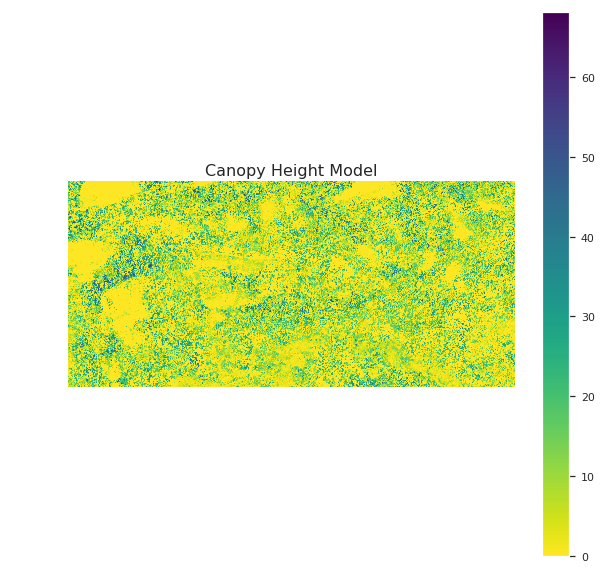

In [32]:
chm = dsm - dtm
fig, axis = plt.subplots(figsize=(10, 10))
lidar_plot = axis.imshow(chm, cmap='viridis_r', extent = dtm_extent)
axis.set_title("Canopy Height Model",
             fontsize = 16)
cbar = plt.colorbar(lidar_plot)
axis.set_axis_off();

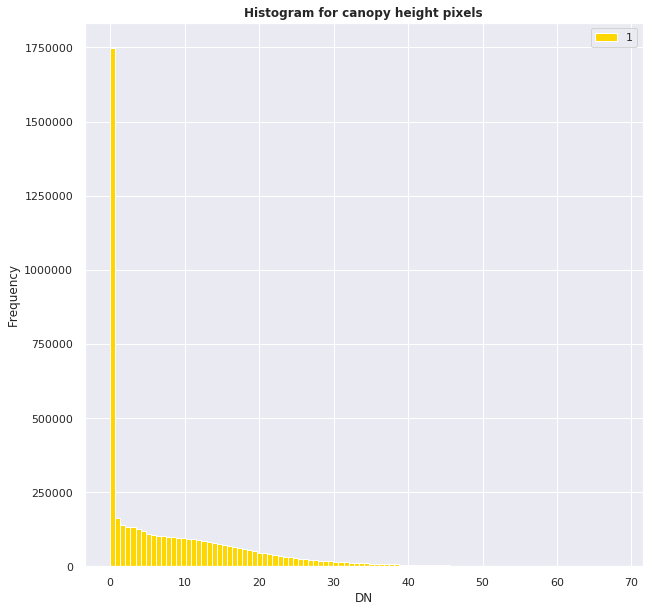

In [41]:
fig, axis = plt.subplots(figsize = (10, 10))
show_hist(chm, bins=100, title = 'Histogram for canopy height pixels')

In [42]:
print("min height recorded = ", chm.min())
print("max height recorded = ", chm.max())

min height recorded =  0.0
max height recorded =  68.119995


## Now let's add colorbreaks

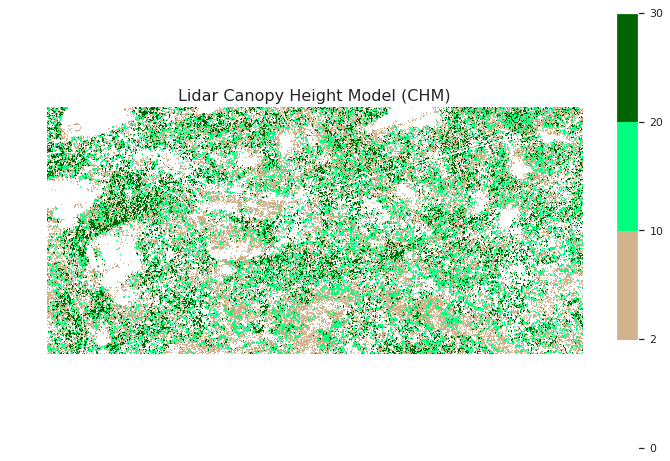

In [50]:
# Define the colors you want
from matplotlib.colors import ListedColormap
import matplotlib
cmap = ListedColormap(["white", "tan", "springgreen", "darkgreen"])

# Define a normalization from values -> colors
norm = matplotlib.colors.BoundaryNorm([0, 2, 10, 20, 30], 5)
fig, ax = plt.subplots(figsize=(12, 8))
chm_plot = ax.imshow(chm, 
                     cmap=cmap,
                     norm=norm)
ax.set_title("Lidar Canopy Height Model (CHM)", fontsize=16)
plt.colorbar(chm_plot)
ax.set_axis_off();

In [64]:
with rio.open('data/outputs/SOAP_lidarCHM.tiff', 'w', **dsm_meta) as fp:
    fp.write(chm,1)

/home/armaan/anaconda3/envs/_py36/lib/python3.6/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


# Working with vector data

In [79]:
import geopandas as gpd
sjer_plot_locations = gpd.read_file('data/tut/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp')
sjer_crop = gpd.read_file('data/tut/california/neon-sjer-site/vector_data/SJER_crop.shp')
sjer_road = gpd.read_file('data/tut/california/madera-county-roads/tl_2013_06039_roads.shp')
# print(type(sjer_plot_locations))
# print(sjer_plot_locations.total_bounds)
# print(sjer_plot_locations.crs)
print(sjer_plot_locations.shape)
print(sjer_road.shape)
print(sjer_crop.shape)
sjer_plot_locations.head(2)

(18, 6)
(9640, 5)
(1, 2)


,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)


In [80]:
sjer_road.head(2)

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110454239066,N 14th St,M,S1400,"LINESTRING (-120.272267 37.116151, -120.27244 ..."
1,110454239052,N 11th St,M,S1400,"LINESTRING (-120.267877 37.116672, -120.268072..."


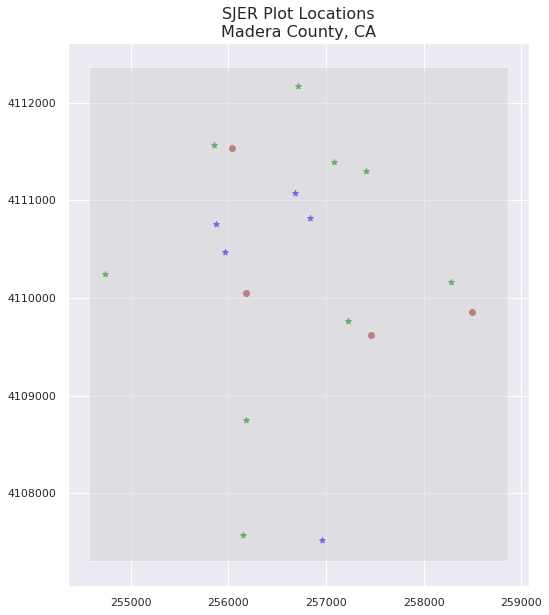

In [88]:
plot_attrs = {'grass': ['blue', '*'], 
               'soil': ['brown','o'],
               'trees': ['green','*']}
fig, axis = plt.subplots(figsize = (10,10))
for ctype, data in sjer_plot_locations.groupby('plot_type'):
    data.plot(color=plot_attrs[ctype][0], 
              label = ctype,
              ax = axis, 
             marker = plot_attrs[ctype][1],  
)
# sjer_plot_locations.plot(column = 'plot_type', legend = True, ax=axis)
sjer_crop.plot(color = 'lightgrey', ax=axis, alpha=0.5)
axis.set_title('SJER Plot Locations\nMadera County, CA', fontsize=16);